# View COSMOS-Web Public Data Release 1

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
from astropy.table import Table, Column
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.wcs import WCS
from astropy.nddata import Cutout2D

import warnings
warnings.filterwarnings('ignore')


COSMOS_WEB_CATALOG = '/data/bwedig/galsim_real_galaxies_cosmos_web/COSMOSWeb_mastercatalog_v1.fits'

## Load COSMOS-Web Catalog

In [2]:
with fits.open(COSMOS_WEB_CATALOG) as hdul:
    phot_data = Table(hdul[1].data)  # Extension 1: PHOTOMETRY
    lephare_data = Table(hdul[2].data)  # Extension 2: LEPHARE
    bd_data = Table(hdul[6].data)  # Extension 6: B+D morphology
    
print(f"Loaded {len(phot_data)} sources from COSMOS-Web catalog")
print(f"Available bands: {[col for col in phot_data.colnames if 'mag_auto' in col]}")

Loaded 784016 sources from COSMOS-Web catalog
Available bands: ['mag_auto_hst-f814w', 'mag_auto_f115w', 'mag_auto_f150w', 'mag_auto_f277w', 'mag_auto_f444w', 'mag_auto_f770w']


## Quick look at the tables

In [4]:
phot_data.info()

<Table length=784016>
               name                dtype  shape  n_bad 
--------------------------------- ------- ----- -------
                               id   int64             0
                       segment-id   int64             0
                             tile    str3             0
             id_specz_khostovan25   int64             0
                               ra float64             0
                              dec float64             0
                          x_image float64             0
                          y_image float64             0
                          a_image float64             0
                          b_image float64             0
                      theta_image float64             0
                      theta_world float64             0
                         chi2_max float64             0
                             mode    str4             0
                    snr_hst-f814w float64           104
                    wht_hs

In [5]:
lephare_data.info()

<Table length=784016>
      name        dtype  n_bad
---------------- ------- -----
          zfinal float64     0
            type   int64     0
        zpdf_med float64     0
        zpdf_l68 float64     0
        zpdf_u68 float64     0
           zchi2 float64     0
       chi2_best float64     0
          nbfilt   int64     0
          zp_agn float64     0
        chi2_agn float64     0
         mod_agn float64     0
        mod_star float64     0
        chi_star float64     0
mod_minchi2_phys   int64     0
     ebv_minchi2 float64     0
     law_minchi2   int64     0
     age_minchi2 float64  5599
    mass_minchi2 float64     0
     sfr_minchi2 float64 20451
    ssfr_minchi2 float64 20451
         age_l68 float64     0
         age_med float64     0
         age_u68 float64     0
        mass_l68 float64     0
        mass_med float64     0
        mass_u68 float64     0
         sfr_l68 float64     0
         sfr_med float64     0
         sfr_u68 float64     0
        ssfr_l68 

In [6]:
bd_data.info()

<Table length=784016>
               name                 dtype  n_bad
---------------------------------- ------- -----
                       ra_detec_bd float64     0
                      dec_detec_bd float64     0
                   disk_radius_deg float64     0
               disk_radius_deg_err float64  5758
                  bulge_radius_deg float64     0
              bulge_radius_deg_err float64  9943
                          angle_bd float64     0
                      angle_bd_err float64  5758
                      disk_axratio float64     0
                  disk_axratio_err float64  5758
                     bulge_axratio float64     0
                 bulge_axratio_err float64  9943
                      fmf_b+d_chi2 float64     0
          mag_model_bd_total_f115w float64     0
          mag_model_bd_total_f150w float64     0
          mag_model_bd_total_f277w float64     0
          mag_model_bd_total_f444w float64     0
      mag_err_model_bd_total_f115w float64     

In [7]:
phot_data[0]

id,segment-id,tile,id_specz_khostovan25,ra,dec,x_image,y_image,a_image,b_image,theta_image,theta_world,chi2_max,mode,snr_hst-f814w,wht_hst-f814w,flux_auto_hst-f814w,flux_err_auto_hst-f814w,mag_auto_hst-f814w,flux_aper_hst-f814w,flux_err_aper_hst-f814w,mag_aper_hst-f814w,snr_f115w,wht_f115w,flux_auto_f115w,flux_err_auto_f115w,mag_auto_f115w,flux_aper_f115w,flux_err_aper_f115w,mag_aper_f115w,snr_f150w,wht_f150w,flux_auto_f150w,flux_err_auto_f150w,mag_auto_f150w,flux_aper_f150w,flux_err_aper_f150w,mag_aper_f150w,snr_f277w,wht_f277w,flux_auto_f277w,flux_err_auto_f277w,mag_auto_f277w,flux_aper_f277w,flux_err_aper_f277w,mag_aper_f277w,snr_f444w,wht_f444w,flux_auto_f444w,flux_err_auto_f444w,mag_auto_f444w,flux_aper_f444w,flux_err_aper_f444w,mag_aper_f444w,snr_f770w,wht_f770w,flux_auto_f770w,flux_err_auto_f770w,mag_auto_f770w,flux_aper_f770w,flux_err_aper_f770w,mag_aper_f770w,c_f444w,fwhm,mu_max_hst-f814w,mu_max_f115w,mu_max_f150w,mu_max_f277w,mu_max_f444w,mu_max_f770w,kron_rad,kron1_a,kron1_b,kron1_area,kron2_a,kron2_b,kron2_area,seg_area,kron_corr,kron_f444w_psf_corr,kron_f770w_psf_corr,kron_f770w_ap_corr,flag_star,flag_blend,ra_model,dec_model,radius_sersic,radius_sersic_err,axratio_sersic,axratio_sersic_err,sersic,sersic_err,angle_sersic,angle_sersic_err,e1,e1_err,e2,e2_err,fmf_chi2,group_id,mag_model_f115w,mag_model_f150w,mag_model_f277w,mag_model_f444w,mag_model_hst-f814w,mag_model_f770w,mag_model_cfht-u,mag_model_hsc-g,mag_model_hsc-r,mag_model_hsc-i,mag_model_hsc-z,mag_model_hsc-y,mag_model_hsc-nb0816,mag_model_hsc-nb0921,mag_model_hsc-nb1010,mag_model_uvista-y,mag_model_uvista-j,mag_model_uvista-h,mag_model_uvista-ks,mag_model_uvista-nb118,mag_model_sc-ia484,mag_model_sc-ia527,mag_model_sc-ia624,mag_model_sc-ia679,mag_model_sc-ia738,mag_model_sc-ia767,mag_model_sc-ib427,mag_model_sc-ib505,mag_model_sc-ib574,mag_model_sc-ib709,mag_model_sc-ib827,mag_model_sc-nb711,mag_model_sc-nb816,mag_model_irac-ch1,mag_model_irac-ch2,mag_model_irac-ch3,mag_model_irac-ch4,mag_err_model_f115w,mag_err_model_f150w,mag_err_model_f277w,mag_err_model_f444w,mag_err_model_hst-f814w,mag_err_model_f770w,mag_err_model_cfht-u,mag_err_model_hsc-g,mag_err_model_hsc-r,mag_err_model_hsc-i,mag_err_model_hsc-z,mag_err_model_hsc-y,mag_err_model_hsc-nb0816,mag_err_model_hsc-nb0921,mag_err_model_hsc-nb1010,mag_err_model_uvista-y,mag_err_model_uvista-j,mag_err_model_uvista-h,mag_err_model_uvista-ks,mag_err_model_uvista-nb118,mag_err_model_sc-ia484,mag_err_model_sc-ia527,mag_err_model_sc-ia624,mag_err_model_sc-ia679,mag_err_model_sc-ia738,mag_err_model_sc-ia767,mag_err_model_sc-ib427,mag_err_model_sc-ib505,mag_err_model_sc-ib574,mag_err_model_sc-ib709,mag_err_model_sc-ib827,mag_err_model_sc-nb711,mag_err_model_sc-nb816,mag_err_model_irac-ch1,mag_err_model_irac-ch2,mag_err_model_irac-ch3,mag_err_model_irac-ch4,flux_model_f115w,flux_model_f150w,flux_model_f277w,flux_model_f444w,flux_model_hst-f814w,flux_model_f770w,flux_model_cfht-u,flux_model_hsc-g,flux_model_hsc-r,flux_model_hsc-i,flux_model_hsc-z,flux_model_hsc-y,flux_model_hsc-nb0816,flux_model_hsc-nb0921,flux_model_hsc-nb1010,flux_model_uvista-y,flux_model_uvista-j,flux_model_uvista-h,flux_model_uvista-ks,flux_model_uvista-nb118,flux_model_sc-ia484,flux_model_sc-ia527,flux_model_sc-ia624,flux_model_sc-ia679,flux_model_sc-ia738,flux_model_sc-ia767,flux_model_sc-ib427,flux_model_sc-ib505,flux_model_sc-ib574,flux_model_sc-ib709,flux_model_sc-ib827,flux_model_sc-nb711,flux_model_sc-nb816,flux_model_irac-ch1,flux_model_irac-ch2,flux_model_irac-ch3,flux_model_irac-ch4,flux_err-uncal_model_f115w,flux_err-uncal_model_f150w,flux_err-uncal_model_f277w,flux_err-uncal_model_f444w,flux_err-uncal_model_hst-f814w,flux_err-uncal_model_f770w,flux_err-uncal_model_cfht-u,flux_err-uncal_model_hsc-g,flux_err-uncal_model_hsc-r,flux_err-uncal_model_hsc-i,flux_err-uncal_model_hsc-z,flux_err-uncal_model_hsc-y,flux_err-uncal_model_hsc-nb0816,flux_err-uncal_model_hsc-nb0921,flux_err-uncal_model_hsc-nb1010,flux_err-uncal_model_uvista-y,fl

In [19]:
idx = 0
tile = phot_data['tile'][idx]
coords = SkyCoord(phot_data['ra'][idx], phot_data['dec'][idx], unit='deg')

detection_file = f'/data/bwedig/galsim_real_galaxies_cosmos_web/detection_images/detection_chi2pos_SWLW_{tile}.fits'

fits.info(detection_file)

Filename: /data/bwedig/galsim_real_galaxies_cosmos_web/detection_images/detection_chi2pos_SWLW_A1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SCI           1 PrimaryHDU      75   (19200, 24910)   float32   


In [9]:
data = fits.getdata(detection_file)
print(f"Detection image shape: {data.shape}")

Detection image shape: (24910, 19200)


In [20]:
# Get WCS from the FITS header
with fits.open(detection_file) as hdul:
    wcs = WCS(hdul[0].header)

# Create cutout centered at coords
size = (100, 100)  # size in pixels (height, width)
cutout = Cutout2D(data, coords, size, wcs=wcs)

print(f"Cutout shape: {cutout.data.shape}")
print(f"Cutout center (sky): {coords.ra.deg:.6f}, {coords.dec.deg:.6f}")
print(f"Cutout center (pixel): {cutout.input_position_cutout}")

Cutout shape: (100, 100)
Cutout center (sky): 149.857546, 2.093537
Cutout center (pixel): (np.float64(49.49609469488132), np.float64(49.861654298925714))


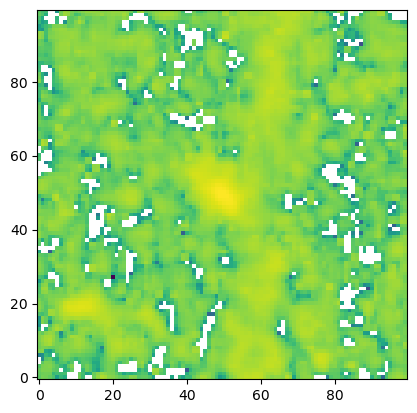

In [22]:
plt.imshow(cutout.data, origin='lower', norm=LogNorm())